# Setup a Cooke triplet with python

The following python code creates a .mac file which is a macro that can be executed within the OpTaliX cli with the command "run Cooke_triplet.mac". This procedure is used for convenience in order to have a list of OpTaliX commands afterwards and to clearly separate between command syntax and text in this notebook. Once you have executed this notebook the file "Cooke_triplet.mac" will be located in the path "filename" (see below).

At first a function is defined to write a string line into a file.

In [1]:
def wl(file, L):
    """
    Function for writing a line in a file.
    """   
    file.writelines(L)
    file.write("\n") 

## Setup of the optical model
Now the code to create the .mac file (with a sequence of OpTaliX commands) for the creation of an optical model of a Cooke triplet (as starting system) follows:

In [2]:
    import os
    from datetime import date
    today = date.today()
    d2 = today.strftime("%B %d, %Y")
    
    filename = "Cooke_triplet.mac"      # name of the .mac file to be written using python
    f = open(os.path.join(r"C:\ProgramData\OpTaliX\macro", filename),"w")
    
    wl(f, ['! execute in Optalix with: run '+str(filename)])
    wl(f, ['! this file should be located in "C:\ProgramData\OpTaliX\macro"'])
    wl(f, ['! generated with python: ', d2])
    wl(f, [''])          # empty line
    
    wl(f, ['! This macro sets up a Cooke triplet'])     # write our first commend
    wl(f, ['len'])                 # create a new lens
    wl(f, ['! dim m          ! standard is [mm]'])
    
    wl(f, ['ins s'+str(2)+'         ! insert one surface'])
    wl(f, ['ins s'+str(3)+'..s'+str(10)+'       ! insert multiple surfaces'])
    
    #wl(f, ['SAY '+str(18.47)])     # = starting marginal reference height at surface 1 (semi-diameter of entrance pupil)
    wl(f, ['EPD '+str(18.3*2)])    # = starting marginal reference height at surface 1 (entrance pupil)
    
    #wl(f, ['SCY FANG 20.81'])      # define reference object height, important for FOB!, p. 66 of KDP-2 manual, express object by angle
    #wl(f, ['YOB 20.81'])            # Object coordinates (Y) for finite object distances
    #wl(f, ['TH 1.0E20'])           # set thickness of 1st surface to infinite (beam collimated)
    wl(f, ['THI s0 1.0E20'])
    #wl(f, ['AIR'])                 # the medium of between surface 0 is air
    
    #wl(f, ['AIR'])                 # insert 2nd surface with medium air

    wl(f, [''])          # empty line    
    wl(f, ['sut s1..s10 s      ! set surface types (s = spherical)'])
    wl(f, [''])          # empty line
    
    wl(f, ['FHY s1 1           ! Sets the height of surfaces si..j to fixed '])    
    wl(f, ['THI s1 0'])
    
    #wl(f, ['FHY s2 1           ! Sets the height of surfaces si..j to fixed '])    
    wl(f, ['RDY s2 40.94'])            # set the radius of the 2nd surface
    wl(f, ['THI s2 8.74'])             # set the thickness between 2nd surface and 3rd surface
    wl(f, ['CIR s2 p1 18.5'])           # set circular clear aperture to ...
    wl(f, ['com s'+str(2)+' 1st lens 1st surface       ! surface comments'])   # give surface a surface comment
    wl(f, ['GLA s2 K-SSK4'])          # set the medium to glass "SSK4"
    wl(f, [''])          # empty line
    
    #wl(f, ['FHY s3 1           ! Sets the height of surfaces si..j to fixed '])    
    wl(f, ['THI s3 11.05'])
    wl(f, ['CIR s3 p1 18.5'])
    wl(f, ['com s3 1st lens 2nd surface'])  # give surface a label
    wl(f, [''])          # empty line
    
    #wl(f, ['FHY s4 1           ! Sets the height of surfaces si..j to fixed '])    
    wl(f, ['RDY s4 -55.65'])
    wl(f, ['THI s4 2.78'])
    wl(f, ['CIR s4 p1 14.9'])
    wl(f, ['GLA s4 SF2'])
    wl(f, [''])          # empty line
    
    #wl(f, ['FHY s5 1           ! Sets the height of surfaces si..j to fixed '])   
    wl(f, ['RDY s5 39.75'])
    wl(f, ['THI s5 1'])
    wl(f, ['CIR s5 p1 14.4'])
    #wl(f, ['AIR'])
    wl(f, [''])          # empty line
    
    #wl(f, ['FHY s6 1           ! Sets the height of surfaces si..j to fixed ']) 
    wl(f, ['THI s6 6.63'])
    #wl(f, ['REFS'])                # reference surface
    #wl(f, ['ASTOP'])               # aperture stop
    wl(f, ['sto s6           ! set stop surface'])
    wl(f, ['com s6 aperture stop'])  # give surface a label
    #wl(f, ['AIR'])
    wl(f, [''])          # empty line
    
    #wl(f, ['FHY s7 1           ! Sets the height of surfaces si..j to fixed ']) 
    wl(f, ['RDY s7 107.9'])
    wl(f, ['THI s7 9.54'])
    wl(f, ['CIR s7 p1 15.5'])
    wl(f, ['GLA s7 K-SSK4'])
    wl(f, [''])          # empty line
    
    wl(f, ['FHY s8 1           ! Sets the height of surfaces si..j to fixed '])   
    wl(f, ['RDY s8 -43.33'])
    wl(f, ['THI s8 78'])
    wl(f, ['CIR s8 p1 15.5'])
    #wl(f, ['AIR'])
    wl(f, [''])          # empty line
    
    #wl(f, ['AIR'])
    #wl(f, ['AIR'])
    #wl(f, ['EOS'])
    wl(f, [''])          # empty line
    
    wl(f, ['nfld '+str(5)])
    wl(f, ['xan f1 '+str(20.81)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f1 '+str(0)])
    
    wl(f, ['xan f2 '+str(-20.81)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f2 '+str(0)])
    
    wl(f, ['xan f3 '+str(0)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f3 '+str(0)])
    
    wl(f, ['xan f4 '+str(0)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f4 '+str(20.81)])
    
    wl(f, ['xan f5 '+str(0)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f5 '+str(-20.81)])
    
    #wl(f, ['VIEVIG YES'])         # automatic vignetting in VIE
    #wl(f, ['set vig'])
    #wl(f, ['SET MHT s1..8 f1..5 z1'])

    wl(f, ['vie'])                # show lens layout
    
    f.close()

You then go to KDP-2 folder start the application and input "input file Cooke_triplet.dat" in the command line. This will execute all the commands written with the function "wl" in this section. You will obtain this plot:

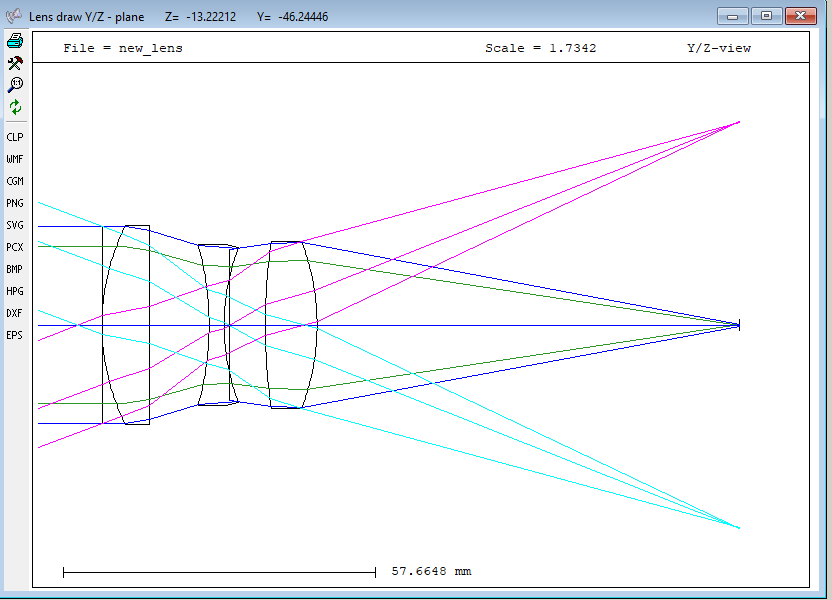

In [3]:
PATH = r'C:\Users\herbst\OpticalDesignDocu'
from IPython.display import Image
Image(filename = PATH + "\OpTaliX_Cooke_triplet.png", width=1000, height=800)

Or view in orthographic projection:

In [4]:
wl(f, ['vie ortho']) 

ValueError: I/O operation on closed file.

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_ortho.png", width=1000, height=800)

In [ ]:
wl(f, ['headings on'])    # show headings of tables 
wl(f, ['rtg all'])        # radius, thickness, glass material of current lens


In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_table.png", width=600, height=600)

The lens can be updated and its specifications can be changed:

In [ ]:
wl(f, ['u l'])             # update lens
wl(f, ['chg 2'])           # change surface 2
wl(f, ['rd 40.94'])        # radius to value
wl(f, ['chg 3'])           # change surface 3
wl(f, ['th 11.05']) 
wl(f, ['ins 1'])           # insert surface at 1
wl(f, ['del 1'])           # delete surface at 1
wl(f, ['eos'])             # exit update lens

## Analysis
The aberrations of this Cooke triplet can be analyzed with the following commands:

In [ ]:
wl(f, ['PXTY ALL'])    # display YZ-plane paraxial ray data

The 3rd, 5th and 7th order aberration values calculated are based on the work of Buchdahl. To calculate and display the 3rd, 5th and 7th order spherical aberrations, issue the command:

In [ ]:
wl(f, ['SA357 ALL'])   # the 3rd, 5th and 7th order spherical aberrations

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_SA.png", width=300, height=300)

Chromatic differences:

In [ ]:
wl(f, ['PCW?'])        # query primary and secondary wavelength pairs
wl(f, ['SCW?'])
wl(f, ['PCDSA ALL'])   # calculate the primary chromatic differences for 3rd, 5th and 7th order spherical aberrations

ABERRATION FANS AND THEIR PLOTS - To generate transverse fan data at a specific point in the field of view, issue an "FOB" command which specifies that fractional field of view location. In our example lens, the SCY FANG value was 20.81 degrees. To use "FOB" to specify that analysis is to be performed at a Y-object angle of 2.5 degrees and an X-object angle of 1.25 degrees, issue:
    

In [ ]:
wl(f, ['FOB 0.1201 0.060067'])
wl(f, ['YFAN, -1, 1, 1, 11'])
wl(f, ['DRAWFAN'])

One obtains this table of values which can also be written to a text file (and plotted with matplotlib, e.g.) or it can be directly plotted with KDP-2 (see below).

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_yfan_preopt.png", width=900, height=800)

The "FANS" command can be used to generate more complex ray fan aberration graphics. The next two commands generate YZ and XZ-plane, transverse ray aberration plots at three pre-selected field of view positions.

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_fans_preopt.png", width=900, height=800)

Plotting of spot diagrams in KDP-2 and with python (see: [Create spot diagram and plot with python](./KDP-2_spot_diagram_matplotlib.ipynb)), using:

In [ ]:
wl(f, ['FOB .1 .1'])
wl(f, ['SPD'])         # create spot diagram data
wl(f, ['PLTSPD'])      # plot spot diagram in KDP-2

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_spot_dia_preopt.png", width=900, height=800)

DIFFRACTION MTF - Diffraction MTF generation and plotting is almost as easy. Try the following commands to generate DOTF data at fractional object point Y=.1 and X=.2:

In [ ]:
wl(f, ['FOB .1 .2'])
wl(f, ['CAPFN'])         # generates the complex aperture function
wl(f, ['DOTF'])          # generates the MTF
wl(f, ['pltdotf'])       # plots the MTF 

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_mtf_unopt.png", width=900, height=800)

## Optimization with predefined operands:

The aim is to vary the last surface curvature and its conic constant of the current lens so as to change the system focal length to 100 mm while at the same time driving the 3rd order spherical aberration to 0.0. 

Lists of predefined target operands in KDP-2 are here: 
[**Operands**](./KDP-2_markdown.md)

Just type the following lines in the KDP-2 cli:

Do a PY solve:


In [ ]:
wl(f, ['U L'])                  # update lens
wl(f, ['CHG  9'])               # change surface 9
wl(f, ['PY'])                   # PY solve to this surface
wl(f, ['EOS'])                  # return to CMD level

Next, set up the operands (targets) with the following commands:

In [ ]:
wl(f, ['MERIT'])                # enter merit creation mode
wl(f, ['FLCLTH 100 1 0 10'])    # paraxial focal length be targeted to 100 with a weight of 1 for surfaces 0 to 10 (the entire lens).
wl(f, ['SA3 0 1'])              # 3rd order spherical aberration to 0.0 with a weight of 1
wl(f, ['EOS'])                  # return to CMD level


Next, set up the variables with the following commands:

In [ ]:
wl(f, ['variables'])            # enter variables creation mode
wl(f, ['cv 8'])                 # define curvature and conic constant of surface 8 to be variable
wl(f, ['cc 8'])  
wl(f, ['eos'])                  # save these definitions and return to CMD level

In [107]:
wl(f, ['VB'])         # lists the current variables
wl(f, ['OPRD'])       # This lists the current operands with their current and targeted values

ValueError: I/O operation on closed file.

This optimization problem can be solved with damped least squares (ITER) or directly (PFIND) since we have two variables and two operands which happen to be linearly independent. We will do a combination of the two techniques. Type:

In [ ]:
wl(f, ['ITER']) 
wl(f, ['PFIND']) 
wl(f, ['ITER']) 
wl(f, ['VB']) 
wl(f, ['OPRD'])

After these optimization cycles, the FMT (Figure of Merit) will be much smaller than it was. Before we started, it was 0.13095. The new focal length and SA3 values will be very near their target values. Further cycles could drive the values closer to their targets. The new curvature and conic values can be seen by issuing another VB command or by issuing an RTG ALL or an RTG 8 command. The thickness of surface 9 has now changed to 0.474615 mm in order to maintain paraxial focus. There are other optimization methods described in the reference manual which you should try.